## Predicting Students Marks


In [30]:
# Loading imp libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Loading Data
data = pd.read_csv('student_data.csv')
data.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [32]:
data.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [33]:
data.shape

(200, 2)

### Understanding and Visualizaling the data

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [6]:
data.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


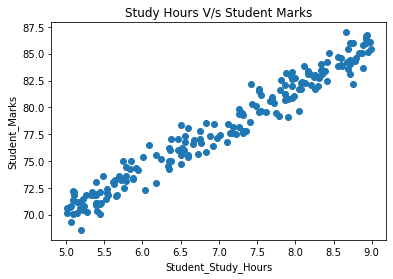

In [7]:
plt.scatter(x=data['study_hours'], y=data['student_marks'])
plt.xlabel('Student_Study_Hours')
plt.ylabel('Student_Marks')
plt.title('Study Hours V/s Student Marks')
plt.show()

In [35]:
data.corr()

,study_hours,student_marks
study_hours,1.000000,0.979919
student_marks,0.979919,1.000000


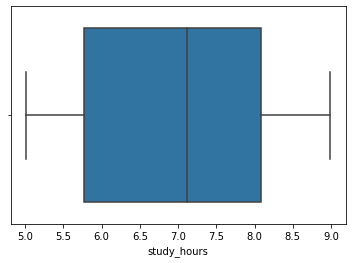

In [8]:
sns.boxplot(x=data['study_hours'])
plt.show()

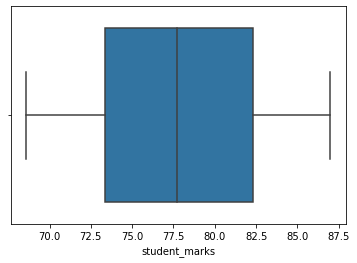

In [9]:
sns.boxplot(x=data['student_marks'])
plt.show()

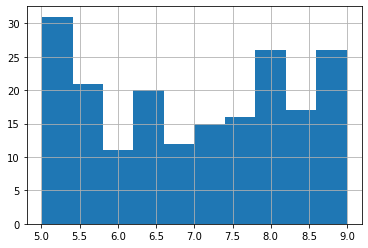

In [10]:
data['study_hours'].hist()

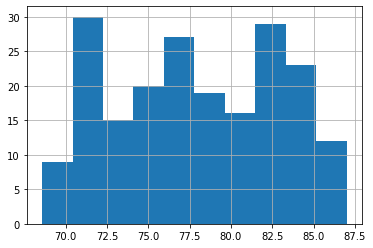

In [11]:
data['student_marks'].hist()

### Data Pre Processing

In [12]:
data.isnull()

,study_hours,student_marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [13]:
data.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [14]:
data.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

### Missing value treatment

In [15]:
# Using Mean Imputation

In [16]:
data_mean = data.fillna(data.mean())

In [17]:
data_mean.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

### Splitting the Data

In [18]:
X = data_mean.drop('student_marks', axis=1)
y = data_mean.drop('study_hours', axis=1)
print(X.shape, y.shape)

(200, 1) (200, 1)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(140, 1) (140, 1)
(60, 1) (60, 1)


### Bulding the Model

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [21]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
lr.coef_ # m or B0

array([[3.92596391]])

In [23]:
lr.intercept_ # c or B1

array([50.49614493])

In [24]:
lr.predict([[4]])[0][0].round(2) # Study_hours = 4 will result in 66%

66.2

In [25]:
y_pred = lr.predict(X_test).round(2)
y_pred

array([[83.51],
       [70.87],
       [72.95],
       [85.36],
       [73.23],
       [84.49],
       [80.14],
       [81.86],
       [80.92],
       [82.22],
       [79.  ],
       [84.85],
       [77.86],
       [77.7 ],
       [83.24],
       [85.79],
       [84.97],
       [72.64],
       [78.72],
       [79.19],
       [84.3 ],
       [85.63],
       [74.76],
       [81.35],
       [72.05],
       [80.41],
       [79.  ],
       [82.1 ],
       [77.96],
       [82.26],
       [75.47],
       [84.61],
       [71.66],
       [75.5 ],
       [70.32],
       [79.  ],
       [75.35],
       [84.53],
       [74.09],
       [71.46],
       [76.05],
       [81.35],
       [76.05],
       [81.71],
       [81.71],
       [80.8 ],
       [70.87],
       [74.21],
       [72.83],
       [76.05],
       [70.56],
       [84.61],
       [70.99],
       [70.91],
       [85.71],
       [71.89],
       [82.41],
       [80.73],
       [71.23],
       [73.07]])

In [26]:
dataFrame = pd.DataFrame(np.c_[X_test, y_test, y_pred], columns=['Study Hours', 'Student_Marks', 'Student_marks_Preddicted'])
dataFrame.head()

,Study Hours,Student_Marks,Student_marks_Preddicted
0,8.41,82.50,83.51
1,5.19,71.18,70.87
2,5.72,73.25,72.95
3,8.88,83.64,85.36
4,5.79,73.64,73.23


### Tuning the Model

In [27]:
lr.score(X_test, y_test)

0.9533846370023684

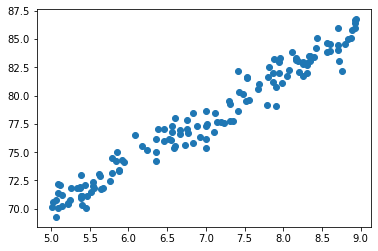

In [28]:
plt.scatter(x=X_train, y=y_train)
plt.show()

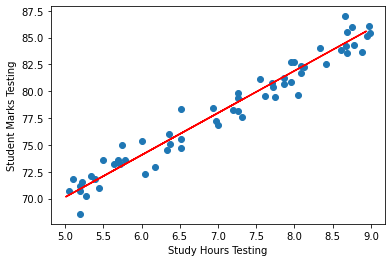

In [29]:
plt.scatter(x=X_test, y=y_test)
plt.plot(X_train, lr.predict(X_train), color='r')
plt.xlabel('Study Hours Testing')
plt.ylabel('Student Marks Testing')
plt.show()

In [56]:
import joblib

joblib.dump(lr, 'Students_marks_predictor.pkl')

['Students_marks_predictor.pkl']

In [57]:
model = joblib.load('Students_marks_predictor.pkl')

In [61]:
model.predict([[5]])[0][0]

70.12596447398337